# Machine with new data

## Imports

In [542]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBRegressor

## Data

In [17]:
origin_df = pd.read_csv('/Users/joseph/code/Ward-cloud/project/venezuela_fx/venezuela_fx/data/friday_feeling_df.csv')

df = origin_df.copy()

In [19]:
df['date'] = df['date'].apply(pd.to_datetime)

In [20]:
df.rename(columns = {'date':'Date'}, inplace=True)

In [21]:
df = df.set_index('Date')

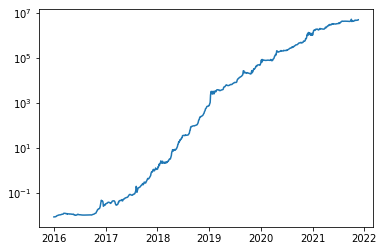

In [22]:
plt.plot(df['Dolartoday'])
plt.yscale('log')

## Flattening

In [23]:
X= df.drop(columns = ['Dolartoday'])
y= df['Dolartoday']

In [24]:
X.shape

(51577, 20)

In [25]:
y.shape

(51577,)

In [26]:
values = []
y_list =[]
target_distance = 7
seq_length =7
for idx in list(range(0,51570)):
    X_temp = X.iloc[idx:idx+seq_length]
    values.append(X_temp.values.reshape(-1))
    y_list.append(y[idx+target_distance])

X_df = pd.DataFrame(np.vstack(values))

y_series = pd.Series(y_list)

## Scaling

### Robust Scaler

### MinMaxScaler

### Logger

In [46]:
df.shape

(51577, 21)

In [47]:
log_scaled_df = np.log(df).diff()

In [48]:
log_scaled_df.shape

(51577, 21)

In [53]:
51577/3

17192.333333333332

In [49]:
log_scaled_df.isna().sum()

Stock_Market                      1
Deposit_Interest_Rate           241
Interest_Rate                     1
Money_Supply_M3                   1
Central_Bank_Balance_Sheet        1
Crude_Oil_Production              1
Crude_Oil_Rig                 12169
Money_Supply_M0                   1
Foreign_Exchange_Reserve          1
External_Debt                 29305
Inflation_Rate                    1
Money_Supply_M2                   1
Inflation_Rate_Mom                1
Private_Sector_Credit             1
Consumer_Price_Index_CPI          1
CPI_Transportation                1
Money_Supply_M1                   1
Banks_Balance_Sheet               1
Dolartoday                        1
BM (BsS)                          1
M2 (BsS)                          1
dtype: int64

In [103]:
log_scaled_df.fillna(0.0, inplace=True)

In [104]:
log_scaled_df.shape

(51577, 21)

In [105]:
51577-17000

34577

In [106]:
ls_train = log_scaled_df.iloc[:34577]

ls_test = log_scaled_df.iloc[34577:]

l_X_test = ls_test.drop(columns=['Dolartoday'])
l_y_test = ls_test['Dolartoday']

l_X_train = ls_train.drop(columns=['Dolartoday'])
l_y_train = ls_train['Dolartoday']

In [107]:
l_X_train.shape

(34577, 20)

In [108]:
values = []
y_list =[]
target_distance = 7
seq_length =7
for idx in list(range(0,16993)):
    X_temp = l_X_test.iloc[idx:idx+seq_length]
    values.append(X_temp.values.reshape(-1))
    y_list.append(l_y_test[idx+target_distance])
flX_test = pd.DataFrame(np.vstack(values))

fly_test = pd.Series(y_list)

In [73]:
# flx_test = X_test
# fly_seri = y_test

In [109]:
l_y_test.shape

(17000,)

In [110]:
values = []
y_list =[]
target_distance = 7
seq_length =7
for idx in list(range(0,34570)):
    X_temp = l_X_train.iloc[idx:idx+seq_length]
    values.append(X_temp.values.reshape(-1))
    y_list.append(l_y_train[idx+target_distance])
flX_train = pd.DataFrame(np.vstack(values))

fly_train = pd.Series(y_list)

In [77]:
# flx_train = X_train
# fly_train = y_train

In [111]:
flX_train.shape

(34570, 140)

In [112]:
fly_train.shape

(34570,)

In [113]:
flX_train.isin([np.inf, -np.inf]).sum().any()

True

In [114]:
flX_train.replace(np.inf, 0.0, inplace=True)
flX_train.replace(-np.inf, 0.0, inplace=True)

In [115]:
flX_test.isin([np.inf, -np.inf]).sum().any()

True

In [116]:
flX_test.replace(np.inf, 0.0, inplace=True)
flX_test.replace(-np.inf, 0.0, inplace=True)

In [117]:
fly_test.isin([np.inf, -np.inf]).sum().any()

False

In [90]:
# flX_train.dropna(inplace=True)

In [93]:
# flX_test.dropna(inplace=True)

## Models

### forest with fly

In [118]:
forest = RandomForestRegressor(n_estimators=60)

In [119]:
forest.fit(flX_train, fly_train)

RandomForestRegressor(n_estimators=60)

In [120]:
forest.score(flX_test, fly_test)

-0.4739960951268787

In [132]:
y_pred = forest.predict(flX_test)

mean_squared_error: 2.301801224575742e-06
mean_absolute_error: 0.0009890129931764914
r2_score: -0.4739960951268787
max_error: 0.01094710120218399


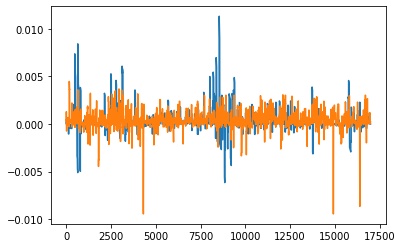

In [160]:
test_scores(fly_test, y_pred)

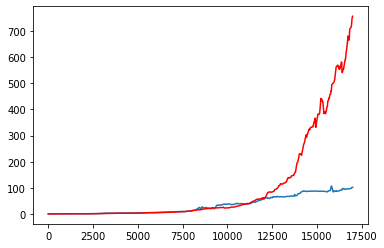

In [174]:
real_vis(fly_test, y_pred)

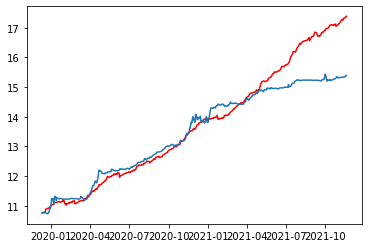

In [210]:
temp_series = pd.Series(y_pred)
temp_series.index=df.iloc[34584:].index
start = df.at[temp_series.index[0], 'Dolartoday']
start = np.log(start)
pred_log = temp_series.cumsum()
pred_log += start
plt.plot(pred_log, color='red')
plt.plot(np.log(df[34584:]['Dolartoday']))

### Ridge

In [127]:
ridge = Ridge(alpha=0.2).fit(flX_train, fly_train)

In [128]:
ridge.score(flX_test, fly_test)

-0.024247966569017843

In [133]:
ridge_y_pred = ridge.predict(flX_test)

In [137]:
mean_absolute_error(fly_test, ridge_y_pred)

0.0007892666764059225

In [138]:
np.mean(ridge_y_pred - fly_test)

0.00014060857831105664

In [139]:
r2_score(fly_test, ridge_y_pred)

-0.024247966569017843

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error

In [ ]:
fly_real = np.exp(fly_test.cumsum())

fly_pred = np.exp((pd.Series(forest.predict(flX_test)).cumsum()))

In [163]:
def test_scores(y_true, y_pred):
    print(f"mean_squared_error: {mean_squared_error(y_true,y_pred)}")
    print(f"mean_absolute_error: {mean_absolute_error(y_true,y_pred)}")
    print(f'r2_score: {r2_score(y_true, y_pred)}')
    print(f'max_error: {max_error(y_true, y_pred)}')
    plt.plot(y_true)
    plt.plot(y_pred)

In [172]:
def real_vis(y_true, y_pred):
    y_true = np.exp(y_true.cumsum())
    y_pred = np.exp(pd.Series(y_pred).cumsum())
    plt.plot(y_true)
    plt.plot(y_pred, color='red')

mean_squared_error: 1.5994718245945148e-06
mean_absolute_error: 0.0007892666764059225
r2_score: -0.024247966569017843
max_error: 0.011196326803839952


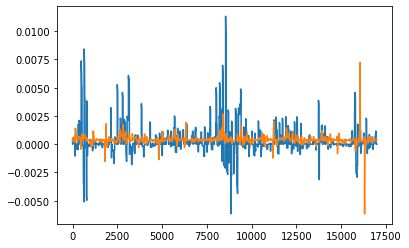

In [165]:
test_scores(fly_test, ridge_y_pred)

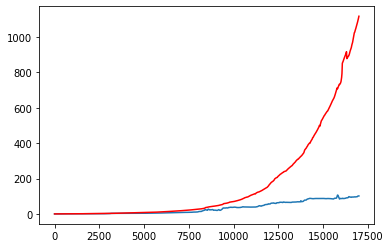

In [173]:
real_vis(fly_test, ridge_y_pred)

### Linear Regression

In [146]:
lin_model = LinearRegression()

In [147]:
lin_model.fit(flX_train, fly_train)

LinearRegression()

In [148]:
lin_pred = lin_model.predict(flX_test)

mean_squared_error: 3.077972054393007e-06
mean_absolute_error: 0.0008778434340496203
r2_score: -0.9710297920799715
max_error: 0.0801687467580285


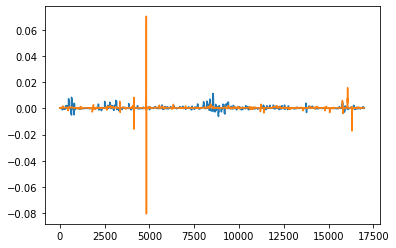

In [157]:
test_scores(fly_test, lin_pred)

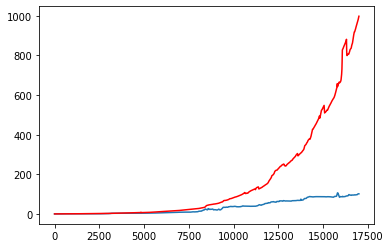

In [175]:
real_vis(fly_test, lin_pred)

### booster

In [150]:
grad_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6)

In [151]:
grad_model.fit(flX_train, fly_train)

GradientBoostingRegressor(max_depth=6)

mean_squared_error: 1.7158578114304383e-06
mean_absolute_error: 0.0008171867452033114
r2_score: -0.0987776385024659
max_error: 0.011172768990062563


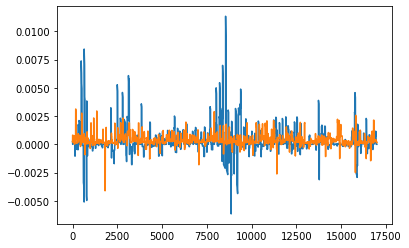

In [159]:
grad_pred = grad_model.predict(flX_test)
test_scores(fly_test, grad_pred)


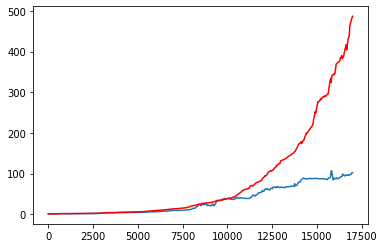

In [176]:
real_vis(fly_test, grad_pred)

In [191]:
len(grad_pred)

16993

In [198]:
temp_series = pd.Series(grad_pred)
temp_series.index=df.iloc[34584:].index

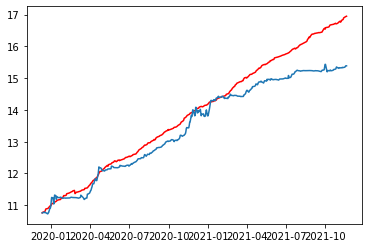

In [209]:
start = df.at[temp_series.index[0], 'Dolartoday']
start = np.log(start)
pred_log = temp_series.cumsum()
pred_log += start
plt.plot(pred_log, color='red')
plt.plot(np.log(df[34584:]['Dolartoday']))



### Mixing it up; exponential smoothin

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [185]:
# # single exponential smoothing
# from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# # # prepare data
# # data = ...
# # # create class
# model = SimpleExpSmoothing(df)
# # fit model
# model.fit(X_train, y_train)
# # make prediction
# yhat = model.predict(X_test)

### with data since 2012

In [218]:
early_origin = pd.read_csv('/Users/joseph/code/Ward-cloud/project/venezuela_fx/venezuela_fx/data/since_2012_master.csv')

In [225]:
early_origin['date'] = early_origin['date'].apply(pd.to_datetime)

In [226]:
early_origin.set_index('date', inplace=True)

In [227]:
e_log_scaled_df = np.log(early_origin).diff()

In [228]:
e_log_scaled_df.shape

(86641, 19)

In [229]:
86641*0.7

60648.7

In [233]:
e_train = e_log_scaled_df.iloc[:60650]

e_test = e_log_scaled_df.iloc[60650:]

e_X_test = e_test.drop(columns=['Dolartoday'])
e_y_test = e_test['Dolartoday']

e_X_train = e_train.drop(columns=['Dolartoday'])
e_y_train = e_train['Dolartoday']

In [234]:
e_X_test.shape

(25991, 18)

In [236]:
values = []
y_list =[]
target_distance = 7
seq_length =7
for idx in list(range(0,25984)):
    X_temp = e_X_test.iloc[idx:idx+seq_length]
    values.append(X_temp.values.reshape(-1))
    y_list.append(e_y_test[idx+target_distance])
e_X_test = pd.DataFrame(np.vstack(values))

e_y_test = pd.Series(y_list)

In [239]:
e_X_train.shape

(60650, 18)

In [240]:
values = []
y_list =[]
target_distance = 7
seq_length =7
for idx in list(range(0,60643)):
    X_temp = e_X_train.iloc[idx:idx+seq_length]
    values.append(X_temp.values.reshape(-1))
    y_list.append(e_y_train[idx+target_distance])
e_X_train = pd.DataFrame(np.vstack(values))

e_y_train = pd.Series(y_list)

In [241]:
e_X_train.shape

(60643, 126)

In [242]:
e_X_train.fillna(0.0, inplace=True)
e_X_test.fillna(0.0, inplace=True)

In [245]:
e_y_test.isna().sum()

0

In [246]:
e_X_train.replace(np.inf, 0.0, inplace=True)
e_X_train.replace(-np.inf, 0.0, inplace=True)

In [247]:
e_X_test.replace(np.inf, 0.0, inplace=True)
e_X_test.replace(-np.inf, 0.0, inplace=True)

In [248]:
# e_X_train = X_train
# e_y_train = y_train
# e_X_test = X_test
# e_y_test = y_test

### Random forest with early_origin

In [250]:
e_forest = RandomForestRegressor()

In [251]:
e_forest.fit(e_X_train, e_y_train)

RandomForestRegressor()

In [252]:
taiga_pred = e_forest.predict(e_X_test)

mean_squared_error: 3.04136534760414e-06
mean_absolute_error: 0.0009511723374138983
r2_score: -0.1540065486112825
max_error: 0.028323964497439204


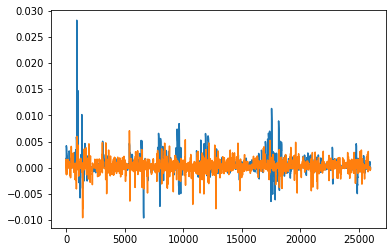

In [253]:
test_scores(e_y_test, taiga_pred)

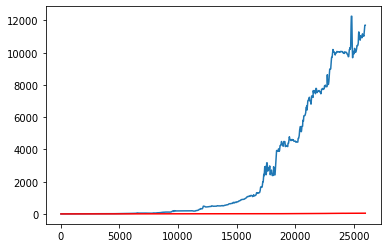

In [261]:
real_vis(e_y_test, taiga_pred)

In [256]:
taiga_pred

array([ 0.00042353,  0.00037014,  0.00022378, ..., -0.00016636,
       -0.00022968, -0.0002933 ])

In [258]:
temp_series = pd.Series(taiga_pred)
temp_series.index=early_origin.iloc[60657:].index

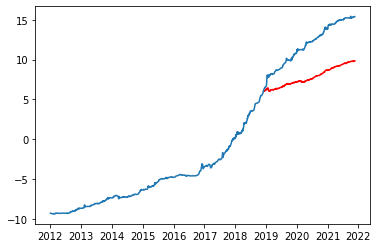

In [269]:
start = early_origin.at[temp_series.index[0], 'Dolartoday']
start = np.log(start)
pred_log = temp_series.cumsum()
pred_log += start
plt.plot(pred_log, color='red')
plt.plot(np.log(early_origin['Dolartoday']))


### dropping early

In [271]:
early_origin.index

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 01:00:00',
               '2012-01-01 02:00:00', '2012-01-01 03:00:00',
               '2012-01-01 04:00:00', '2012-01-01 05:00:00',
               '2012-01-01 06:00:00', '2012-01-01 07:00:00',
               '2012-01-01 08:00:00', '2012-01-01 09:00:00',
               ...
               '2021-11-18 15:00:00', '2021-11-18 16:00:00',
               '2021-11-18 17:00:00', '2021-11-18 18:00:00',
               '2021-11-18 19:00:00', '2021-11-18 20:00:00',
               '2021-11-18 21:00:00', '2021-11-18 22:00:00',
               '2021-11-18 23:00:00', '2021-11-19 00:00:00'],
              dtype='datetime64[ns]', name='date', length=86641, freq=None)

In [272]:
late_origin = early_origin[early_origin.index>='2014-01-01']

In [273]:
late_origin.head()

,Stock_Market,Deposit_Interest_Rate,Interest_Rate,Money_Supply_M3,Central_Bank_Balance_Sheet,Crude_Oil_Production,Crude_Oil_Rig,Money_Supply_M0,Foreign_Exchange_Reserve,External_Debt,Inflation_Rate,Money_Supply_M2,Inflation_Rate_Mom,Private_Sector_Credit,Consumer_Price_Index_CPI,CPI_Transportation,Money_Supply_M1,Banks_Balance_Sheet,Dolartoday
date,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,2.7366,14.74,15.57,12.201,0.0077,2884.0,70.0,4.449,21481.0,309.0,56.1,12.201,2.2,667.8,0.0004,0.5435,11.997,1.51,0.000641
2014-01-01 01:00:00,2.7366,14.73,15.57,12.201,0.0077,2884.0,70.0,4.449,21481.0,309.0,56.1,12.201,2.2,667.8,0.0004,0.5435,11.997,1.51,0.000641
2014-01-01 02:00:00,2.7366,14.72,15.57,12.201,0.0077,2884.0,70.0,4.449,21481.0,309.0,56.1,12.201,2.2,667.8,0.0004,0.5435,11.997,1.51,0.000642
2014-01-01 03:00:00,2.7366,14.71,15.57,12.201,0.0077,2884.0,70.0,4.449,21481.0,309.0,56.1,12.201,2.2,667.8,0.0004,0.5435,11.997,1.51,0.000642
2014-01-01 04:00:00,2.7366,14.70,15.57,12.201,0.0077,2884.0,70.0,4.449,21481.0,309.0,56.1,12.201,2.2,667.8,0.0004,0.5435,11.997,1.51,0.000642


In [274]:
late_logged = np.log(late_origin).diff()

In [281]:
late_logged.shape[0]-48350

20747

In [278]:
np.round(late_logged.shape[0]*0.7)

48368.0

In [282]:
l_train = late_logged.iloc[:48350]

l_test = late_logged.iloc[48350:]

l_X_test = l_test.drop(columns=['Dolartoday'])
l_y_test = l_test['Dolartoday']

l_X_train = l_train.drop(columns=['Dolartoday'])
l_y_train = l_train['Dolartoday']

In [284]:
values = []
y_list =[]
target_distance = 7
seq_length =7
for idx in list(range(0, 48343)):
    X_temp = l_X_train.iloc[idx:idx+seq_length]
    values.append(X_temp.values.reshape(-1))
    y_list.append(l_y_train[idx+target_distance])
lX_train = pd.DataFrame(np.vstack(values))

ly_train = pd.Series(y_list)

In [285]:
values = []
y_list =[]
target_distance = 7
seq_length =7
for idx in list(range(0,20740)):
    X_temp = l_X_test.iloc[idx:idx+seq_length]
    values.append(X_temp.values.reshape(-1))
    y_list.append(l_y_test[idx+target_distance])
lX_test = pd.DataFrame(np.vstack(values))

ly_test = pd.Series(y_list)

In [286]:
lX_train.fillna(0.0, inplace=True)
lX_test.fillna(0.0, inplace=True)

In [287]:
lX_train.replace(np.inf, 0.0, inplace=True)
lX_train.replace(-np.inf, 0.0, inplace=True)

In [289]:
lX_test.replace(np.inf, 0.0, inplace=True)
lX_test.replace(-np.inf, 0.0, inplace=True)

### Forest with late

In [290]:
l_forest = RandomForestRegressor()

In [291]:
l_forest.fit(lX_train, ly_train)

RandomForestRegressor()

In [292]:
sherwood_pred = l_forest.predict(lX_test)

mean_squared_error: 2.631043193268643e-06
mean_absolute_error: 0.0009532539848731101
r2_score: -0.2641041760057792
max_error: 0.013746822670734862


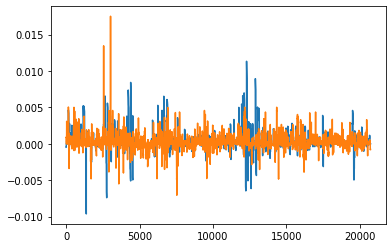

In [293]:
test_scores(ly_test, sherwood_pred)

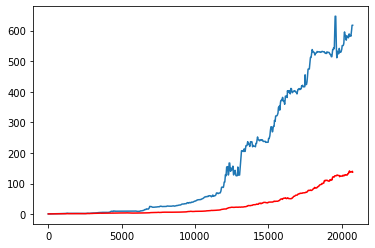

In [294]:
real_vis(ly_test, sherwood_pred)

In [301]:
temp_series = pd.Series(sherwood_pred)
temp_series.index=late_origin.iloc[48357:].index

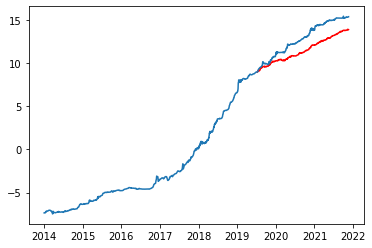

In [305]:
start = late_origin.at[temp_series.index[0], 'Dolartoday']
start = np.log(start)
pred_log = temp_series.cumsum()
pred_log += start
plt.plot(pred_log, color='red')
plt.plot(np.log(late_origin['Dolartoday']))


### grad with late

In [307]:
dustin_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6)

In [308]:
dustin_model.fit(lX_train, ly_train)

GradientBoostingRegressor(max_depth=6)

In [309]:
robinson_pred = l_forest.predict(lX_test)

mean_squared_error: 2.631043193268643e-06
mean_absolute_error: 0.0009532539848731101
r2_score: -0.2641041760057792
max_error: 0.013746822670734862


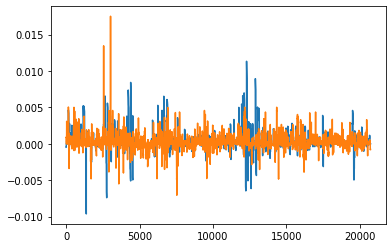

In [310]:
test_scores(ly_test, robinson_pred)

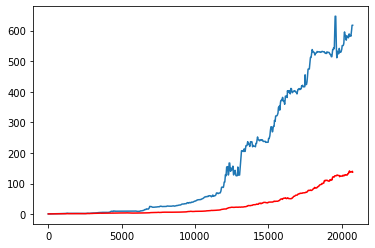

In [311]:
real_vis(ly_test, robinson_pred)

In [312]:
temp_series = pd.Series(robinson_pred)
temp_series.index=late_origin.iloc[48357:].index

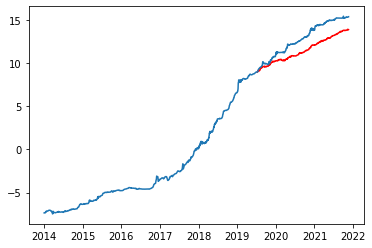

In [313]:
start = late_origin.at[temp_series.index[0], 'Dolartoday']
start = np.log(start)
pred_log = temp_series.cumsum()
pred_log += start
plt.plot(pred_log, color='red')
plt.plot(np.log(late_origin['Dolartoday']))

### Classifiers

In [315]:
cl_origin = late_origin.copy()

In [321]:
cl_origin['change'] = late_origin['Dolartoday'].diff()/late_origin['Dolartoday']

In [324]:
cl_origin.fillna(method='backfill', inplace=True)

In [339]:
pd.cut(cl_origin['change'],bins=5).unique()

[(-0.00311, 0.00463], (-0.0109, -0.00311], (0.00463, 0.0124], (0.0201, 0.0278], (0.0124, 0.0201]]
Categories (5, interval[float64, right]): [(-0.0109, -0.00311] < (-0.00311, 0.00463] < (0.00463, 0.0124] < (0.0124, 0.0201] < (0.0201, 0.0278]]

In [341]:
cl_origin['change_bins'] = pd.cut(cl_origin['change'],bins=5)

In [ ]:
categories = ['negative change', 'stable', 'low inflation', 'medium inflation', 'high inflation']

In [343]:
one = OneHotEncoder()

### classifier

In [349]:
cl = late_origin.copy()

In [350]:
cl.shape

(69097, 20)

In [351]:
cl.head()

,Stock_Market,Deposit_Interest_Rate,Interest_Rate,Money_Supply_M3,Central_Bank_Balance_Sheet,Crude_Oil_Production,Crude_Oil_Rig,Money_Supply_M0,Foreign_Exchange_Reserve,External_Debt,Inflation_Rate,Money_Supply_M2,Inflation_Rate_Mom,Private_Sector_Credit,Consumer_Price_Index_CPI,CPI_Transportation,Money_Supply_M1,Banks_Balance_Sheet,Dolartoday,change
date,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,2.7366,14.74,15.57,12.201,0.0077,2884.0,70.0,4.449,21481.0,309.0,56.1,12.201,2.2,667.8,0.0004,0.5435,11.997,1.51,0.000641,NaN
2014-01-01 01:00:00,2.7366,14.73,15.57,12.201,0.0077,2884.0,70.0,4.449,21481.0,309.0,56.1,12.201,2.2,667.8,0.0004,0.5435,11.997,1.51,0.000641,1.625000e-07
2014-01-01 02:00:00,2.7366,14.72,15.57,12.201,0.0077,2884.0,70.0,4.449,21481.0,309.0,56.1,12.201,2.2,667.8,0.0004,0.5435,11.997,1.51,0.000642,1.625000e-07
2014-01-01 03:00:00,2.7366,14.71,15.57,12.201,0.0077,2884.0,70.0,4.449,21481.0,309.0,56.1,12.201,2.2,667.8,0.0004,0.5435,11.997,1.51,0.000642,1.625000e-07
2014-01-01 04:00:00,2.7366,14.70,15.57,12.201,0.0077,2884.0,70.0,4.449,21481.0,309.0,56.1,12.201,2.2,667.8,0.0004,0.5435,11.997,1.51,0.000642,1.625000e-07


In [367]:
y_num = cl['Dolartoday'].shift(24).dropna()

In [368]:
cl['target'] = y_num

In [371]:
cl.dropna(inplace=True)

In [374]:
cl['pctinf'] = (cl['Dolartoday'] - cl['target'])/cl['Dolartoday']

In [376]:
cl.drop(columns = ['change'], inplace=True)

In [377]:
cl.head()

,Stock_Market,Deposit_Interest_Rate,Interest_Rate,Money_Supply_M3,Central_Bank_Balance_Sheet,Crude_Oil_Production,Crude_Oil_Rig,Money_Supply_M0,Foreign_Exchange_Reserve,External_Debt,...,Money_Supply_M2,Inflation_Rate_Mom,Private_Sector_Credit,Consumer_Price_Index_CPI,CPI_Transportation,Money_Supply_M1,Banks_Balance_Sheet,Dolartoday,target,pctinf
date,,,,,,,,,,,,,,,,,,,,,
2014-01-02 00:00:00,2.7366,14.5,15.57,12.201,0.0077,2884.0,70.0,4.449,21481.0,309.0,...,12.201,2.2,667.8,0.0004,0.5435,11.997,1.51,0.000645,0.000641,0.006045
2014-01-02 01:00:00,2.7366,14.5,15.57,12.201,0.0077,2884.0,70.0,4.449,21481.0,309.0,...,12.201,2.2,667.8,0.0004,0.5435,11.997,1.51,0.000645,0.000641,0.005729
2014-01-02 02:00:00,2.7366,14.5,15.57,12.201,0.0077,2884.0,70.0,4.449,21481.0,309.0,...,12.201,2.2,667.8,0.0004,0.5435,11.997,1.51,0.000645,0.000642,0.005412
2014-01-02 03:00:00,2.7366,14.5,15.57,12.201,0.0077,2884.0,70.0,4.449,21481.0,309.0,...,12.201,2.2,667.8,0.0004,0.5435,11.997,1.51,0.000645,0.000642,0.005096
2014-01-02 04:00:00,2.7366,14.5,15.57,12.201,0.0077,2884.0,70.0,4.449,21481.0,309.0,...,12.201,2.2,667.8,0.0004,0.5435,11.997,1.51,0.000645,0.000642,0.004780


In [379]:
cl['pctinf'].describe()

count    69073.000000
mean         0.007406
std          0.029932
min         -0.260240
25%         -0.000582
50%          0.000758
75%          0.013651
max          0.407355
Name: pctinf, dtype: float64

In [386]:
def to_cat(x):
    if x < 0:
        return 0
    elif x >= 0 and x<0.000758:
        return 1
    elif x < 0.013651:
        return 2
    else:
        return 3

In [387]:
cl['cat'] = cl['pctinf'].apply(to_cat)

In [388]:
cl['cat'].value_counts()

0    19180
3    17269
2    17266
1    15358
Name: cat, dtype: int64

In [389]:
classifier_df = cl.copy()

### splitting cat

In [ ]:
classifier_df.drop(columns =['pctinf', 'target'], inplace=True)

In [399]:
classifier_df

,Stock_Market,Deposit_Interest_Rate,Interest_Rate,Money_Supply_M3,Central_Bank_Balance_Sheet,Crude_Oil_Production,Crude_Oil_Rig,Money_Supply_M0,Foreign_Exchange_Reserve,External_Debt,Inflation_Rate,Money_Supply_M2,Inflation_Rate_Mom,Private_Sector_Credit,Consumer_Price_Index_CPI,CPI_Transportation,Money_Supply_M1,Banks_Balance_Sheet,Dolartoday,cat
date,,,,,,,,,,,,,,,,,,,,
2014-01-02 00:00:00,2.736600e+00,14.5,15.57,1.220100e+01,7.700000e-03,2884.0,70.0,4.449000e+00,21481.0,309.0,56.1,1.220100e+01,2.2,6.678000e+02,4.000000e-04,5.435000e-01,1.199700e+01,1.510000e+00,6.452000e-04,2
2014-01-02 01:00:00,2.736600e+00,14.5,15.57,1.220100e+01,7.700000e-03,2884.0,70.0,4.449000e+00,21481.0,309.0,56.1,1.220100e+01,2.2,6.678000e+02,4.000000e-04,5.435000e-01,1.199700e+01,1.510000e+00,6.451583e-04,2
2014-01-02 02:00:00,2.736600e+00,14.5,15.57,1.220100e+01,7.700000e-03,2884.0,70.0,4.449000e+00,21481.0,309.0,56.1,1.220100e+01,2.2,6.678000e+02,4.000000e-04,5.435000e-01,1.199700e+01,1.510000e+00,6.451167e-04,2
2014-01-02 03:00:00,2.736600e+00,14.5,15.57,1.220100e+01,7.700000e-03,2884.0,70.0,4.449000e+00,21481.0,309.0,56.1,1.220100e+01,2.2,6.678000e+02,4.000000e-04,5.435000e-01,1.199700e+01,1.510000e+00,6.450750e-04,2
2014-01-02 04:00:00,2.736600e+00,14.5,15.57,1.220100e+01,7.700000e-03,2884.0,70.0,4.449000e+00,21481.0,309.0,56.1,1.220100e+01,2.2,6.678000e+02,4.000000e-04,5.435000e-01,1.199700e+01,1.510000e+00,6.450333e-04,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-18 20:00:00,6.036428e+09,36.0,56.86,2.725926e+09,2.031504e+08,756.0,0.0,1.325000e+09,11102.0,0.0,1575.3,2.725926e+09,6.8,1.184882e+11,2.210425e+06,2.512177e+09,2.720677e+09,2.392883e+13,4.820000e+06,1
2021-11-18 21:00:00,6.038301e+09,36.0,56.86,2.725926e+09,2.031504e+08,756.0,0.0,1.325000e+09,11102.0,0.0,1575.3,2.725926e+09,6.8,1.184882e+11,2.210425e+06,2.512177e+09,2.720677e+09,2.392883e+13,4.820000e+06,1
2021-11-18 22:00:00,6.040174e+09,36.0,56.86,2.725926e+09,2.031504e+08,756.0,0.0,1.325000e+09,11102.0,0.0,1575.3,2.725926e+09,6.8,1.184882e+11,2.210425e+06,2.512177e+09,2.720677e+09,2.392883e+13,4.820000e+06,1


In [417]:
list(classifier_df.keys())

['Stock_Market',
 'Deposit_Interest_Rate',
 'Interest_Rate',
 'Money_Supply_M3',
 'Central_Bank_Balance_Sheet',
 'Crude_Oil_Production',
 'Crude_Oil_Rig',
 'Money_Supply_M0',
 'Foreign_Exchange_Reserve',
 'External_Debt',
 'Inflation_Rate',
 'Money_Supply_M2',
 'Inflation_Rate_Mom',
 'Private_Sector_Credit',
 'Consumer_Price_Index_CPI',
 'CPI_Transportation',
 'Money_Supply_M1',
 'Banks_Balance_Sheet',
 'Dolartoday',
 'cat']

In [418]:
classifier_df[list(classifier_df.keys().drop('cat'))] = np.log(
    classifier_df[list(classifier_df.keys().drop('cat'))]).diff()

In [422]:
classifier_df.fillna(method='bfill', inplace=True)

In [423]:
classifier_df.replace(np.inf, 0.0, inplace=True)
classifier_df.replace(-np.inf, 0.0, inplace=True)

In [424]:
classifier_df.shape

(69073, 20)

In [425]:
X_train = classifier_df[:48351].drop(columns = ['cat'])

In [426]:
y_train = classifier_df[:48351]['cat']

In [434]:
X_test = classifier_df[48351:].drop(columns = ['cat'])

In [435]:
y_test = classifier_df[48351:]['cat']

### getting funky with classifier

In [430]:
classifier_df.head()

,Stock_Market,Deposit_Interest_Rate,Interest_Rate,Money_Supply_M3,Central_Bank_Balance_Sheet,Crude_Oil_Production,Crude_Oil_Rig,Money_Supply_M0,Foreign_Exchange_Reserve,External_Debt,Inflation_Rate,Money_Supply_M2,Inflation_Rate_Mom,Private_Sector_Credit,Consumer_Price_Index_CPI,CPI_Transportation,Money_Supply_M1,Banks_Balance_Sheet,Dolartoday,cat
date,,,,,,,,,,,,,,,,,,,,
2014-01-02 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000065,2
2014-01-02 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000065,2
2014-01-02 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000065,2
2014-01-02 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000065,2
2014-01-02 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000065,2


In [511]:
teutoburg = RandomForestClassifier(n_estimators=100, max_depth=4, verbose=True, n_jobs=-1)

In [512]:
teutoburg.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestClassifier(max_depth=4, n_jobs=-1, verbose=True)

In [513]:
X_test.fillna(method='ffill', inplace=True)

In [514]:
teutoburg.score(X_test, y_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


0.6421677444262137

In [515]:
t_pred = teutoburg.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [510]:
accuracy_score(y_test, t_pred)

0.665524563266094

### Gradient boost classifier

In [538]:
hara = GradientBoostingClassifier(max_depth=6, validation_fraction=0.1)

In [539]:
hara.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=6)

In [540]:
kiri_pred = hari.predict(X_test)

In [541]:
accuracy_score(y_test, kiri_pred)

0.6647041791332883

### Logistic regression

In [543]:
logger = LogisticRegression()

In [544]:
logger.fit(X_train, y_train)

LogisticRegression()

In [547]:
log_pred = logger.predict(X_test)

In [548]:
accuracy_score(y_test, log_pred)

0.3650709390985426